# Лабораторная работа №1

# Задание

Необходимо познакомиться с фреймворком машинного обучения PyTorch и выполнить три задания:
1. Регрессия по теореме универсальной аппроксимации, ручное дифференцирование
2. Бинарная классификация с помощью автодиффиренцирования PyTorch
3. Обучить полносвязную нейронную сеть классификации 3 классов изображений из набора данных CIFAR100 по варианту с точностью на тестовой выборке не менее 70%.

Для задания 3 нужно сформировать свою подвыборку CIFAR100 по варианту.

Лабораторные выполняются на платформе Google Colab - просто перейдите по ссылки в начале ноутбука. Также можно работать с ноубуками лабораторных локально.

Отчет должен содержать: титульный лист, задание с вариантом, скриншоты и краткие пояснения по каждому этапу лабораторной работы.

# Варианты для Задания 3
Вы должны использовать следующие классы из CIFAR100:
1. Номер группы + 4
2. Номер варианта + 17
3. Номер варианта + 42

# Контрольные вопросы
1. Что такое функция потерь
2. Что такое оптимизатор
3. Что такое активационная функция
4. Полносвязная нейронная сеть
5. Количество нейронов связей и весов в полносвязной нейронной сети
6. Что такое эпоха, итерация, батч обучения
7. Что такое тестовая, обучающая выборка
8. Как устроен набор данных, какие в нем данные и их количество
9. Что такое PyTorch
10. Обучение с учителем
11. Задачи регрессии и классификации

### Методы и функции PyTorch

(Документация: https://pytorch.org/docs/stable/index.html)

Библиотеки:

* __np__ - библиотека NumPy для работы с многомерными массивами данных
* __pickle__ - библиотека Pickle для сериализации и десериализации структур данных ЯП Python
* __sklearn__ - библиотека, реализующая в основном методы классического машинного обучения и инструменты для работы с ними
* __PIL__ - легковесная библиотека Pillow для работы с изображениями и вывода графических элементов напрямую в Jupyter Notebook
* __matplotlib__ - библиотека для построения графиков, по большей части повторяет API Matlab'a
* __torch__ - библиотека Pytorch для глубокого обучения нейронных сетей

__Принятые сокращения__:
* torch.nn - nn
* torch.nn.functional - F
* torch.optim - optim

__Методы__:
* __torch.Tensor__ - cоздает тензор из многомерного массива Numpy и наследует его тип данных. По умолчанию память под тензоры выделяется на CPU. При выставлении флага __requires_grad__ автоматически отслеживает градиенты с помощью движка autograd, который строит динамический вычислительный граф. Включить отслеживания тензора __t__ можно так же при помощи метода __t.requires_grad_(True)__. В таком случае после вызова метода __backward__, в поле __grad__ будут записаны производные. Производные тензора __t__ можно очистить вызовом метода __t.grad.zero_()__. Для того чтобы отсечь ненужные вычисления производных используется метод __detach__, который создаёт копию тензора, при этом флаг __requires_grad__ снимается и отслеживание движком autograd прекращается.

* __torch.numpy__ - создает многомерный NumPy массив данных из тензора

* __torch.item__ - возвращает число, но только если ранг тензора 0. В противном случае выдаёт ошибку и следует использовать torch.numpy

* __torch.uint8__, __torch.int16__, __torch.int64__, __torch.float32__ - приведение массива к новому типу, аналогично NumPy. Для приведения используется метод .to (например `t.to(torch.int64)`). По умолчанию все вычисления на графе производятся в float64, есть также возможность использования mixed precision (что-то во float16, что-то во float64), но это считается продвинутой техникой.

* __torch.ones__, __torch.zeros__, __torch.transpose__, __torch.reshape__ - API похожий, как у NumPy

* __torch.rand__ - создание случайного тензора с числами в диапазоне от 0 до 1. Размерность перечисляется через запятую

* __torch.t__ - транспонирование тензора, похоже на рассмотренный ранее __numpy.transpose__. Если дан тензор X, то можно его транспонировать при помощи `X.t()`

* __torch.sum__ - суммирование элементов тензора вдоль указанной оси __axis__. Если суммирование производится вдоль последней оси, то разрешается указать вместо номера -1. Для сохранения исходной размерности тензора, необходимо выставить флаг __keepdims__.

* __torch.maximum__ - производит поэлементное сравнение тензоров и возвращает максимальный из элементов. На практике используется для реализации некоторых функций активации нейронной сети

* __torch.mm__ - произведение тензоров. Для 2 двухмерных матриц с размерностями (M, N) и (N, K) результатом данного метода будет двухмерная матрица размерностью (M, K)

* __torch.exp__ - повторяет функционал __numpy.exp__ - поэлементное возведение тензора в степень экспоненты

* __torch.log__ - поэлементная операция логарифмирования тензора - взятие натурального логарифма, обратная операция потенциирования

* __torch.flatten__ - аналогично NumPy .reshape(-1), если указан параметр start_dim, то начинает "выпрямление" массива начиная с указанного номера. Т.е. для того, чтобы перевести тензор t с формой (100, 32, 32, 3) в форму (100, 3072) достаточно написать `torch.flatten(t, start_dim=1)`

* __F.one_hot__ - один из многих способов получить горячую кодировку класса в виде PyTorch тензора. Например, для 5 классов, горячая кодировка класса "4" будет [0, 0, 0, 1, 0]

* __torch.utils.data.TensorDataset__ - создание связанных тензоров, например обучающих примеров и соответствующих меток. В качестве аргумента передаются тензоры. Приемлемый способ создания набора данных, когда обучающая выборка некрупная и полностью помещается в оперативной памяти.

* __torch.utils.data.DataLoader__ - В основе утилиты загрузки данных PyTorch лежит класс DataLoader. Он представляет собой Python объект, повторяющийся по набору данных, с поддержкой набора данных в стиле map и итератора; настройки порядка загрузки данных; автоматического разбиения на минибатчи;загрузки данных в один и несколько процессов/потоков. Самые полезные аргументы в конструкторе - размер мини-батча __batch_size__ и число параллельных процессов __num_workers__. Чтобы перемешать данные (для лучшей сходимости), следует выставить флаг __shuffle__ в True

* __torch.save__ - сохранение параметров модели на постоянный носитель информации. Для этого первым аргументом передаётся model.state_dict(), где model - обученная нейросетевая модель, а вторым аргументов передаётся путь с именем файла.


__Создание моделей__:

Создание моделей осуществляется при помощи модуля nn, при этом в модуле уже реализованы самые популярные блоки нейронных сетей или слои, такие как:
* полносвязный слов Linear
* свёрточный слой Conv2d
* пуллинг MaxPool2d
* нормализация BatchNorm2d
* множество активационных функций ReLU, Softmax, Tanh
* слои-регуляризаторы, например Dropout

В данной лабораторной работе мы рассмотрим лишь 2 блока-кирпичика нейронной сети из выше приведённого списка, а именно Linear и ReLU.

Задать модель можно 2 способам:

1. при помощи nn.Sequential
2. при помощи наследования от класса nn.Module

Первый способ подходит для создания простых моделей без ответвлений. По сути их можно представить как конвейер, где входной тензор передается ряду последовательно приведённых трансформаций для получения выходного тензора.

Если необходимо применять более сложные архитектуры, где конвейерные дорожки могут разветвляться на несколько частей, то используется nn.Module. Данный подход позволяет реализовать самые разные архитектуры.

Для создания простого многослойного перцептрона с одним скрытым слоем и функцией нелинейности, согласно первому способу достаточно написать следующий код:

    model = nn.Sequential(
      nn.Linear(input_dims, hidden_dims),
      nn.ReLU(),
      nn.Linear(hidden_dims, num_classes)
    )

Для создания простого многослойного перцептрона с одним скрытым слоем и функцией нелинейности, согласно второму способу необходимо создать класс и модель как экземпляр этого класса:

    class MLP(nn.Module):
        def __init__(self, input_dims, hidden_dims, num_classes,
                     *args, **kwargs):
            super(MLP, self).__init__()
            self.fc1 = Linear(input_dims, hidden_dims)
            self.fc2 = Linear(hidden_dims, num_classes)
        
        def forward(self, input):
             x = self.fc1(input)
             x = F.relu(x)
             x = self.fc2(x)
             return x
    
    model = MLP(input_dims, hidden_dims, num_classes)

При этом допускается вкладывать nn.Module и nn.Sequential внутри других модулей, что позволяет создавать очень сложные архитектуры моделей.



__Обучение моделей__:

Перед обучением моделей необходимо выбрать функцию потерь и оптимизатор. Различные функции потерь представлены также в модуле nn:
* __nn.MSELoss__ - среднеквадратическая ошибка (y_true-y_pred)**2
* __nn.BCEWithLogitsLoss__ - бинарная перекрёстная энтропия для задач бинарной классификации
* __nn.CrossEntropyLoss__ - категориальная перекрёстная энтропия для задач многоклассовой классификации

В качестве альтернативы можно собственноручно реализовать функцию потерь, например для MSELoss:

    inputs, y = batch
    ...
    output = model(inputs)
    loss = ((output - y)**2).sum()
    ...

Оптимизаторы содержатся в модуле __torch.optim__. Существует множество оптимизаторов целевой функции, классическим является стохастический градиентный спуск Stochastic Gradient Descent или SGD. В конструктор класса необходимо передать веса модели, а также указать шаг обучения или learning rate.

Для перевода модели в состояние обучения необходимо вызвать метод __train__. После чего модель готова для обучения.

Для обучения нейросетевых моделей используется градиентный спуск и его разновидности, в основе которых лежит метод последовательных приближений.

За одну эпоху условно выбирают прохождение итератора через весь набор данных, за одну итерацию - оптимизация параметров модели с помощью текущего мини-батча. PyTorch автоматически считает производные при вызове метода __backward__, применённому к функции потерь.

При этом при повторном вызове, значения новых градиентов добавятся к предыдущим расчитанным. Поэтому, для избежания нежелательных эффектов принято очищать прошлые значения градиентов на каждой итерации при помощи метода __zero_grad__, применённого к экземпляру класса оптимизатора.

Для обновления параметров нейронной сети используется метод __step__, применённый к экземпляру класса оптимизатора.

__Проверка качества моделей__:

Для перевода модели в состояние проверки необходимо вызвать метод __eval__. После чего модель готова для проверки.

Выходной тензор предсказаний модели необходимо отсечь от вычислительного графа. Для этого используется метод __detach__, применённый к выходному тензору модели. В противном случае возможны утечки памяти. Метод __numpy__ конвертирует тензор в многомерный массив NumPy.

По умолчанию модель выводит так называемые логиты классов, а не их вероятности. Для получения вероятностей необходимо применить функцию активации __Softmax__. Однако на практике это необязательно, поскольку величина логитов согласуется с вероятностью классов, и для получения номера наиболее вероятного класса этот этап можно опустить. Номер класса получается при помощи либо метода __argmax__, либо метода __argsort__, причём последний позволяет считать такие метрики, как Accuracy@5 и метрики ранжирования.



## Импортирование необходимых библиотек

In [ ]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import pickle
from sklearn.metrics import classification_report
from sklearn.datasets import make_circles, make_moons
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Часть 1. Задача регрессии по теореме универсальной аппроксимации, ручное дифференцирование

## Генерация выборки и инициализация параметров нейронной сети

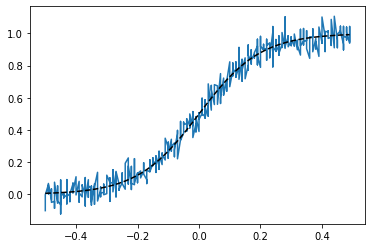

In [ ]:
X = (np.arange(100)/100 - 0.5).repeat(5)

y = 1/(1+np.exp(-10*X))
yn = np.random.normal(scale=0.05, size=y.size)+y

plt.plot(X, yn)
plt.plot(X, y, linestyle='--', c='k')
################################################
tensor_X = torch.Tensor(X.reshape(-1, 1))
tensor_y = torch.Tensor(yn.reshape(-1, 1))

HIDDEN_SIZE = 64
# Инициализация весов MLP с одним скрытым слоём
weights_1 = (torch.rand(1, HIDDEN_SIZE)-.5)/10
bias_1 = torch.zeros(HIDDEN_SIZE)

weights_2 = (torch.rand(HIDDEN_SIZE, 1)-.5)/10
bias_2 = torch.zeros(1)

## Обучение нейронной сети задачи регрессии

0.00411374


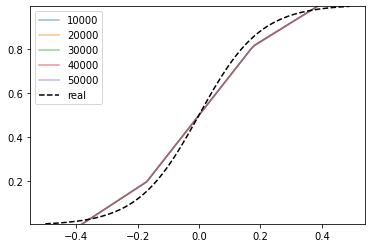

In [ ]:
# Определяем функцию нелинейности
relu = lambda x: torch.maximum(x, torch.Tensor([0]))
# Прямой проход
forward = lambda x: (weights_2.t()*relu((weights_1*x) + bias_1)
                      ).sum(axis=-1,keepdims=True) + bias_2
loss = lambda y, y_: ((y-y_)**2).sum(axis=-1)

# # обратный проход
def backward(X, y, y_pred):
    # производная функции потерь по y_pred
    dL = 2*(y_pred-y)
    # значения нейронов скрытого слоя до применения активации
    Ax = (weights_1*X) + bias_1
    # значения нейронов скрытого слоя после применения активации
    A = relu(Ax)
    # производная функции потерь по weight_2
    dW2 = torch.mm(A.t(), dL)
    # производная функции потерь по bias_2
    db2 = dL.sum(axis=0)
    # производная функции потерь по значениям скрытого слоя после активации
    dA = torch.mm(dL, weights_2.t())
    # производная функции потерь по значениям скрытого слоя до активации
    dA[Ax<=0] = 0
    # производная функции потерь по weight_1
    dW = torch.mm(X.t(), dA)
    # производная функции потерь по bias_1
    db = dA.sum(axis=0)
    #print(dW.shape, db.shape, dW2.shape, db2.shape)
    return dW, db, dW2, db2

def optimize(params, grads, lr=0.001):
    # градиентный спуск по всей обучающей выборке
    W1, b1, W2, b2 = params
    W1 -= lr*grads[0]
    W2 -= lr*grads[2]
    b1 -= lr*grads[1]
    b2 -= lr*grads[3]
    return W1, b1, W2, b2

for i in range(50000): # 50 тысяч итераций градиентного спуска == 50 тысяч эпох
  output = forward(tensor_X)
  cur_loss = loss(output, tensor_y)
  grads = backward(tensor_X, tensor_y, output)
  params = [weights_1, bias_1, weights_2, bias_2]
  weights_1, bias_1, weights_2, bias_2 = optimize(params, grads, 1e-4)
  if (i+1)%10000 == 0:
      plt.plot(X, output.numpy(), label=str(i+1), alpha=0.5)
plt.plot(X, y, linestyle='--', c='k', label='real')
plt.legend()
plt.ylim(y.min(), y.max())
print(cur_loss.numpy().mean())

# Часть 2. Бинарная классификация с помощью автодиффиренцирования PyTorch

## Генерация выборки и инициализация параметров нейронной сети

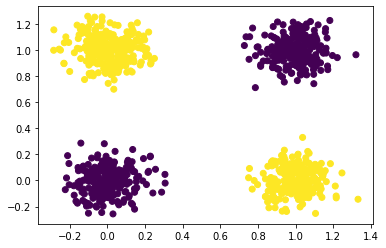

In [ ]:
X = np.random.randint(2, size=(1000, 2))

y = (X[:, 0] + X[:, 1]) % 2 # XOR
X = X + np.random.normal(0, scale=0.1, size=X.shape)
#X, y = make_circles(n_samples=1000, noise=0.025)
#X, y = make_moons(n_samples=1000, noise=0.025)
plt.scatter(X[:, 0], X[:, 1], c=y)
####################################################
tensor_X = torch.Tensor(X.reshape(-1, 2))
tensor_y = torch.Tensor(y.reshape(-1, 1))

HIDDEN_SIZE = 16
# Инициализация весов MLP с одним скрытым слоём
weights_1 = ((torch.rand(2, HIDDEN_SIZE)-.5)/10).detach().requires_grad_(True)
bias_1 = torch.zeros(HIDDEN_SIZE, requires_grad=True)

weights_2 = ((torch.rand(HIDDEN_SIZE, 1)-.5)/10).detach().requires_grad_(True)
bias_2 = torch.zeros(1, requires_grad=True)

## Обучение нейронной сети задачи классификации

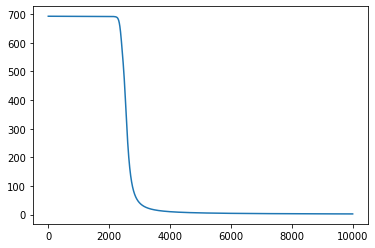

In [ ]:
# Определяем функцию нелинейности
def sigmoid(x):
    return 1/(1+torch.exp(-x))

# Прямой проход
def forward(x):
    hidden = torch.mm(x, weights_1) + bias_1
    hidden_nonlin = sigmoid(hidden)
    output = (weights_2.t()*hidden_nonlin).sum(axis=-1,keepdims=True) + bias_2
    return sigmoid(output)

# Logloss
def loss(y_true, y_pred):
    return -1*(y_true*torch.log(y_pred)+(1-y_true)*torch.log(1-y_pred)).sum()

# задаём шаг обучения
lr = 1e-3
# задаём число итераций
iters = 10000
params = [weights_1, bias_1, weights_2, bias_2]
losses = []
for i in range(iters):
    output = forward(tensor_X)
    lossval = loss(tensor_y, output)
    lossval.backward() # тут включается в работу autograd
    for w in params:
        with torch.no_grad():
            w -= w.grad*lr # обновляем веса
        w.grad.zero_() # зануляем градиенты, чтобы не накапливались за итерации
    losses.append(lossval.item())
# выводим историю функции потерь по итерациям
plt.plot(losses)

## Проверка результатов обучения

(-0.44704305363214614, 1.493271777693263)

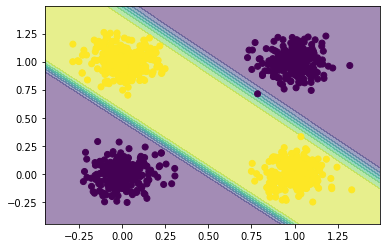

In [ ]:
X_diff = X.max() - X.min()
X_left = X.min() - 0.1*X_diff
X_right = X.max() + 0.1*X_diff
grid = np.arange(X_left, X_right, 0.01)
grid_width = grid.size
surface = []
# создаем точки по сетке
for x1 in grid:
    for x2 in grid:
        surface.append((x1, x2))
surface = np.array(surface)
# получаем предсказания для всех точек
with torch.no_grad():
    Z = forward(torch.Tensor(surface)).detach().numpy()
# меняем форму в виде двухмерного массива
Z = Z.reshape(grid_width, grid_width)
xx = surface[:, 0].reshape(grid_width, grid_width)
yy = surface[:, 1].reshape(grid_width, grid_width)
# рисуем разделяющие поверхности классов
plt.contourf(xx, yy, Z, alpha=0.5)
# рисуем обучающую выборку
plt.scatter(X[:, 0], X[:, 1], c=output.detach().numpy()>0.5)
# задаём границы отображения графика
plt.xlim(X_left, X_right)
plt.ylim(X_left, X_right)

# Часть 3. Классификация изображений CIFAR100

## Загрузка и распаковка набора данных CIFAR100

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
!tar -xvzf cifar-100-python.tar.gz

--2023-02-22 14:36:22--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz.1’

cifar-100-python.ta 100%[===================>] 161.17M  69.5MB/s    in 2.3s    

2023-02-22 14:36:24 (69.5 MB/s) - ‘cifar-100-python.tar.gz.1’ saved [169001437/169001437]

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


## Чтение тренировочной и тестовой выборки

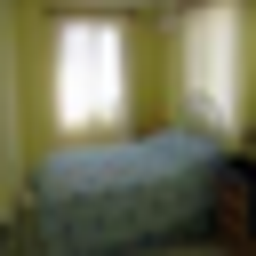

In [ ]:
with open('cifar-100-python/train', 'rb') as f:
    data_train = pickle.load(f, encoding='latin1')
with open('cifar-100-python/test', 'rb') as f:
    data_test = pickle.load(f, encoding='latin1')

# Здесь указать ваши классы по варианту!!!
CLASSES = [5, 23, 48]

train_X = data_train['data'].reshape(-1, 3, 32, 32)
train_X = np.transpose(train_X, [0, 2, 3, 1]) # NCHW -> NHWC
train_y = np.array(data_train['fine_labels'])
mask = np.isin(train_y, CLASSES)
train_X = train_X[mask].copy()
train_y = train_y[mask].copy()
train_y = np.unique(train_y, return_inverse=1)[1]
del data_train

test_X = data_test['data'].reshape(-1, 3, 32, 32)
test_X = np.transpose(test_X, [0, 2, 3, 1])
test_y = np.array(data_test['fine_labels'])
mask = np.isin(test_y, CLASSES)
test_X = test_X[mask].copy()
test_y = test_y[mask].copy()
test_y = np.unique(test_y, return_inverse=1)[1]
del data_test
Image.fromarray(train_X[50]).resize((256,256))

## Создание Pytorch DataLoader'a

In [ ]:
batch_size = 256
dataloader = {}
for (X, y), part in zip([(train_X, train_y), (test_X, test_y)],
                        ['train', 'test']):
    tensor_x = torch.Tensor(X)
    tensor_y = F.one_hot(torch.Tensor(y).to(torch.int64),
                                     num_classes=len(CLASSES))/1.
    dataset = TensorDataset(tensor_x, tensor_y) # создание объекта датасета
    dataloader[part] = DataLoader(dataset, batch_size=batch_size, shuffle=True) # создание экземпляра класса DataLoader
dataloader

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f97d0fa8ac0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f97d180b940>}

## Создание Pytorch модели многослойного перцептрона с одним скрытым слоем

In [ ]:
class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.tensor(mean)
        self.std = torch.tensor(std)

    def forward(self, input):
        x = input / 255.0
        x = x - self.mean
        x = x / self.std
        return torch.flatten(x, start_dim=1) # nhwc -> nm

class Cifar100_MLP(nn.Module):
    def __init__(self, hidden_size=32, classes=100):
        super(Cifar100_MLP, self).__init__()
        # https://blog.jovian.ai/image-classification-of-cifar100-dataset-using-pytorch-8b7145242df1
        self.norm = Normalize([0.5074,0.4867,0.4411],[0.2011,0.1987,0.2025])
        self.seq = nn.Sequential(
            nn.Linear(32*32*3, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, classes),
        )

    def forward(self, input):
        x = self.norm(input)
        return self.seq(x)

HIDDEN_SIZE = 16
model = Cifar100_MLP(hidden_size=HIDDEN_SIZE, classes=len(CLASSES))
model

Cifar100_MLP(
  (norm): Normalize()
  (seq): Sequential(
    (0): Linear(in_features=3072, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=3, bias=True)
  )
)

## Выбор функции потерь и оптимизатора градиентного спуска

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

## Обучение модели по эпохам

In [ ]:
EPOCHS = 250
steps_per_epoch = len(dataloader['train'])
steps_per_epoch_val = len(dataloader['test'])
losses = []
val_losses = []
for epoch in range(EPOCHS):  # проход по набору данных несколько раз
    running_loss = 0.0
    model.train()
    for i, batch in enumerate(dataloader['train'], 0):
        # получение одного минибатча; batch это двуэлементный список из [inputs, labels]
        inputs, labels = batch

        # очищение прошлых градиентов с прошлой итерации
        optimizer.zero_grad()

        # прямой + обратный проходы + оптимизация
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        #loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()

        # для подсчёта статистик
        running_loss += loss.item()
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / steps_per_epoch:.3f}')
    losses.append(running_loss / steps_per_epoch)
    running_loss = 0.0
    model.eval()
    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader['test'], 0):
            inputs, labels = data

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
    print(f'[{epoch + 1}, {i + 1:5d}] val loss: {running_loss / steps_per_epoch_val:.3f}')
    val_losses.append(running_loss / steps_per_epoch_val)
print('Обучение закончено')

[1,     6] loss: 1.073
[1,     2] val loss: 1.002
[2,     6] loss: 0.926
[2,     2] val loss: 0.858
[3,     6] loss: 0.846
[3,     2] val loss: 0.780
[4,     6] loss: 0.792
[4,     2] val loss: 0.784
[5,     6] loss: 0.749
[5,     2] val loss: 0.764
[6,     6] loss: 0.717
[6,     2] val loss: 0.713
[7,     6] loss: 0.691
[7,     2] val loss: 0.673
[8,     6] loss: 0.670
[8,     2] val loss: 0.658
[9,     6] loss: 0.653
[9,     2] val loss: 0.604
[10,     6] loss: 0.636
[10,     2] val loss: 0.635
[11,     6] loss: 0.623
[11,     2] val loss: 0.710
[12,     6] loss: 0.612
[12,     2] val loss: 0.628
[13,     6] loss: 0.602
[13,     2] val loss: 0.606
[14,     6] loss: 0.595
[14,     2] val loss: 0.587
[15,     6] loss: 0.584
[15,     2] val loss: 0.595
[16,     6] loss: 0.578
[16,     2] val loss: 0.598
[17,     6] loss: 0.570
[17,     2] val loss: 0.587
[18,     6] loss: 0.565
[18,     2] val loss: 0.636
[19,     6] loss: 0.559
[19,     2] val loss: 0.651
[20,     6] loss: 0.553
[20,  

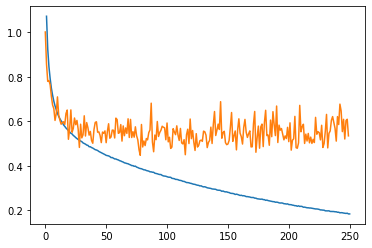

In [ ]:
plt.plot(range(1, EPOCHS + 1), losses, val_losses)

## Проверка качества модели по классам на обучающей и тестовой выборках

In [ ]:
for part in ['train', 'test']:
    y_pred = []
    y_true = []
    with torch.no_grad(): # отключение автоматического дифференцирования
        for i, data in enumerate(dataloader[part], 0):
            inputs, labels = data

            outputs = model(inputs).detach().numpy()
            y_pred.append(outputs)
            y_true.append(labels.numpy())
        y_true = np.concatenate(y_true)
        y_pred = np.concatenate(y_pred)
        print(part)
        print(classification_report(y_true.argmax(axis=-1), y_pred.argmax(axis=-1),
                                    digits=4, target_names=list(map(str, CLASSES))))
        print('-'*50)

train
              precision    recall  f1-score   support

           5     0.9572    0.9400    0.9485       500
          23     0.9517    0.9460    0.9488       500
          48     0.9629    0.9860    0.9743       500

    accuracy                         0.9573      1500
   macro avg     0.9573    0.9573    0.9572      1500
weighted avg     0.9573    0.9573    0.9572      1500

--------------------------------------------------
test
              precision    recall  f1-score   support

           5     0.7865    0.7000    0.7407       100
          23     0.7778    0.8400    0.8077       100
          48     0.8155    0.8400    0.8276       100

    accuracy                         0.7933       300
   macro avg     0.7933    0.7933    0.7920       300
weighted avg     0.7933    0.7933    0.7920       300

--------------------------------------------------


## Визуализация весов

(10, 3072)


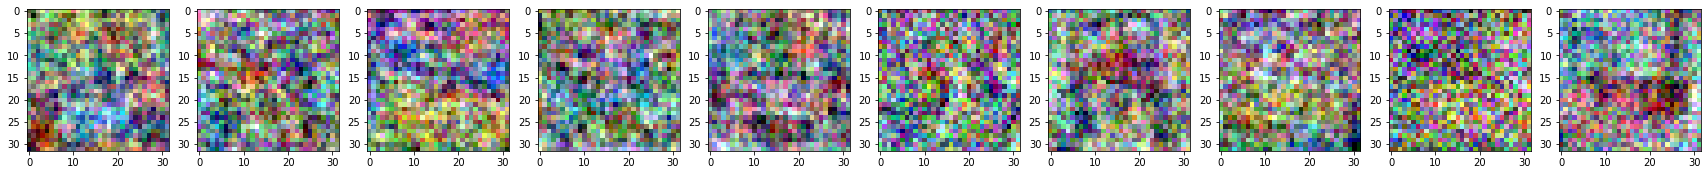

In [ ]:
weights = list(model.parameters())[0].detach().numpy()
print(weights.shape)
fig, ax = plt.subplots(1, weights.shape[0], figsize=(3*weights.shape[0], 3))
for i, ω in enumerate(weights):
    ω = ω.reshape(32, 32, 3)
    ω -= np.percentile(ω, 1, axis=[0, 1])
    ω /= np.percentile(ω, 99, axis=[0, 1])
    ω = np.clip(ω, 0, 1)
    ax[i].imshow(ω)

# Описание методов библиотек

### Методы и функции NumPy:

(Подробнее в документации https://numpy.org/doc/1.22/reference/index.html)

* __np.array__ - создание массива из списка или другого массива
* __np.shape__ - выводит размерность многомерного массива (т.е. для массива 2х2 будет выведен кортеж (2, 2))
* __np.size__ - выводит число элементов в массиве (т.е. для массива 2х2 будет выведено число 4)
* __np.uint8__, __np.int16__, __np.int64__, __np.float32__ - приведение массива к новому типу, при этом в памяти выделяется место под новый массив выбранного типа. Число после типа обозначет, сколько бит данных используется для хранения одного элемента массива. Для хранения картинок зачастую используется экономный uint8 - беззнаковый 8-битный целочисленный тип данных (диапазон чисел 0-255)
* __np.ones__, __np.zeros__  - создание уже заполненных массивов либо единицами, либо нулями. В качестве аргумента передается список или кортеж с требуемой размерностью. Например `np.ones((10,))` создаст вектор из 10 единичек. А `np.zeros((32, 32, 3))` создаст двузмерный массив разрешением 32 на 32 пикселя с 3 каналами. На практике используется для проверки архитектуры модели в прямом направлении
* __np.arange__ - создание уже заполненного массива в виде возрастающей арифметической прогресии от первого аргумента до второго аргумента не включительно с шагом, который задаётеся третьим аргументом. Первый и третий аргументы можно опускать, в таком случае получается компактная запись `np.arange(3)` => [0, 1, 2]
* __np.repeat__ - дублирование элементов массива на количество, указанное первым аргументом. Таким образом, для массива `arr = [0, 1]` `arr.repeat(2)` вернёт [0, 0, 1, 1]
* __np.exp__ - применение поэлементной операции потенциирования к массиву
* __np.random.normal__ - генерация массива, заполненного случайными нормальными величинами со стандартным отклонением, задающимся через аргумент scale и со средним значением, равным аргументу mean. Число элементов в массиве задаётся числом или списком, переданным аргументу size.
* __np.random.randint__ - генерация массива, заполненного случайными целыми числами в диапазоне, задающимся аналогично __np.arange__. Число элементов в массиве задаётся числом или списком, переданным аргументу size.
* __np.reshape__  - буквально изменение размерности многомерного массива с учётом числа элементов. В качестве аргумента передается многомерный массив, а также список или кортеж с новой размерностью. Например `np.reshape([0, 1, 2, 3], (2,2))` создаст двухмерный массив размером 2х2. При этом в памяти новый массив не выделяется, а меняется лишь способ обхода по нему. Разрешается также и следующий способ вызова метода: `arr.reshape(2, 2)`. Обратите внимание на отсутствие дополнительных скобок. Если вместо конкретного числа подставить -1, то размерность будет подсчитана автоматически. На практике используется для выпрямление картинок в виде одномерного массива: `X.reshape(-1, 3072)`# [100, 32, 32, 3] -> [100, 3072]
* __np.transpose__  - переименование осей многомерного массива. Для работы с изображениями принято два формата NHWC и NCHW (N - число картинок в массиве, C - число каналов, H - высота, W - ширина). В качестве аргумента передается многомерный массив, а также список или кортеж с новой расстановкой осей. Например `np.transpose([[0, 1, 2, 3]], (1,0))` создаст двухмерный вектор-столбец [[[0], [1], [2], [3]]. Заметьте, что отсчет осей начинается с 0. На практике используется для перевода NHWC в NCHW и обратно. В первом случае 0 ось N остаётся на своём первом месте, первая и вторая оси H и W сдвигаются на одну позицию вправо, а 3 ось - C ставится на второе место. Т.е. получим следующую перестановку: [0, 3, 1, 2]
* __np.isin__ - аналог SQL оператора IN, поэлементная проверка вхождения массива в коллекцию. `np.isin([0, 2, 1], [2, 3])` вернёт [False, True, False]
* __индексирование__ - выбор подмассива или среза массива осуществляется с помощью квадратных скобок []. Если `arr = np.array([2, 1, 0])`, то `arr[0]` вернёт первый элемент. `arr[[0, 1]]` - обращение по индексу, `arr[[True, False, True]]` - обращение по булевой маске. Заметьте, что обращение по индексу необязательно должно совпадать с размерностью массива, в отличие от обращения по маске. На практике удобно записывать значения маски в отдельную переменную. Для выбора конкретного столбца в многомерном массиве используется синтаксис срезов [:, k], где k - номер столбца. Если k равняется -1, то используется последний столбец или элемент. Так, например, для массива `arr = np.array([[0, 1], [2, 3], [4, 5])` выражение `arr[:, 0]` вернет массив [0, 2, 4]. Поскольку используется индекс срезов (стандартный синтаксис Python), то можно также выполнять срезы многомерных массивов. Для предыдущего примера `arr[1:2, 0:1]` вернёт [[2]]
* __np.unique__ - аналог SELECT DISTINCT в SQL. При стандартных параметрах возвращает одномерный подмассив, содержащий уникальные элементы. Если указать выставить флаг __return_inverse__, то вернется массив с номерами отсчётов массива с уникальными элементами. По сути выполняется Label Encoding
* __np.concatenate__ - конкатенация многомерного массива вдоль указанной оси. Номер оси указывается через аргумент __axis__. Например может быть использован для объединения нескольких признаков или нескольких наборов данных. В контексте изображений может использоваться для объединения или склейки нескольких изображений в одно как вертикально, так и горизонтально. В контексте звука - склеивание двух аудиодорожек.
* __np.max__, __np.min__ - возвращает максимальный и минимальный элементы массива вдоль указанной оси, соответственно. Если номер оси не указан, то возвращается число. Номер оси указывается через аргумент __axis__. Если указывается -1, то полагается, что используется последний номер оси. Разрешается также и вызов функции в качестве метода многомерного массива: `arr.max()`
* __np.argmax__ - возвращает индекс максимального элемента массива вдоль указанной оси. Если номер оси не указан, то возвращается первый индекс, соответвующих максимальному значению в массиве, т.е. одно число. Номер оси указывается через аргумент __axis__. Если указывается -1, то полагается, что используется последний номер оси. На практике используется для расчёта метрики доли правильных ответов модели (Accuracy). Разрешается также и вызов функции в качестве метода многомерного массива: `arr.argmax(axis=-1)`

### Методы и функции Pickle
(Документация: https://docs.python.org/3/library/pickle.html)

* __pickle.dump__ - сериализация структуры данных Python. Первым аргументом идёт сама структура, а вторым FileObject. При этом FileObject должен быть открыт в режиме записи байт (wb). Можно указать кодировку байт (big endian/ little endian). Тем самым можно хранить на постоянном носителе стандартные структуры данных, в том числе NumPy массивы.
* __pickle.load__ - десериализация структуры данных Python. Первым аргументом идёт FileObject. При этом FileObject должен быть открыт в режиме чтения байт (rb). Можно указать кодировку байт (big endian/ little endian). Тем самым можно загружать ранее сохранённые структуры данных, что может быть полезно, если для их создания требуется длительное время (например, параметры модели глубокого обучения)


### Методы и функции Sklearn
(Документация: https://scikit-learn.org/stable/modules/classes.html)

* __datasets.make_circles__, __datasets.make_moons__ - генерация синтетической обучающей выборки для задачи классификации, возвращает X - двухмерный массив с числом примеров и числом признаков (признаков 2), а также одномерный массив с метками классов (0 или 1)

* __metrics.classification_report__ - cоздает текстовый отчет, показывающий основные метрики классификации (доля правильных ответов, полнота, точность, f1-мера). В качестве первого аргумента передаются истинные метки класса, в качестве второго - метки класса, предсказанные моделью. Дополнительные полезные аргументы: digits - число выводимых знаков после запятой (по умолчанию 2), output_dict - возвращает словарь с расчитанными метриками вместо строки, sample_weight - расчитывает взвешенные метрики на основе веса каждого примера

* __metrics.confusion_matrix__ - вычисляет матрицу ошибок модели для оценки точности классификации. Матрица ошибок идеальной модели имеет значения только на главной диагонали. Может быть использована для подсчёта всех классических метрик классификации (доля правильных ответов, полнота, точность, специфичность, f1-мера).

### Методы и функции PIL

(Документация: https://pillow.readthedocs.io/en/stable/)

* __Image.fromarray__ - cоздает объект Image на основе двухмерного массива или двухмерного массива с каналами. Часто ругается, если тип данных не uint8. Часто ругается, если производится попытка создать черно-белое изображения из картинки размерностью (W, H, 1). Для того, чтобы получить обратно массив из объекта Image, достаточно привести его к NumPy массиву, например np.array(img)

* __Image.resize__ - меняет разрешение изображения с помощью интерполяции. Первым аргументом указывается список с новой шириной и высотой изображения. При желании можно указать тип интерполяции через аргумент resample. Поддерживаемые значения: PIL.Image.NEAREST, PIL.Image.BOX, PIL.Image.BILINEAR, PIL.Image.HAMMING, PIL.Image.BICUBIC, PIL.Image.LANCZOS. По умолчанию используется бикубическая интерполяция.

* __Image.convert__ - переводит изображение из одной цветовой схемы в другую. Новая цветовая схема передается строкой, L - черно белая, LA - черно-белая с прозрачностью, RGB - стандартная цветовая схема с 3 каналами, RGBA - стандартная цветовая схема с 3 каналами цвета и одним каналом прозрачности, HSV - альтернативное цветовое представление и т.д.

* __Image.open__ - считывает изображение по указанному пути в виде строки или FileObject. При создании набора данных может неправильно определить формат (например L вместо RGB), поэтому рекомендуется сразу после open приводить к нужному формату при помощи метода convert

* __Image.save__ - сохраняет изображение по указанному пути в виде строки или FileObject. Если указывается FileObject, то нужно также указать формат изображения в аргументе format, например 'PNG' или 'JPEG'

### Методы и функции Matplotlib

(Документация: https://matplotlib.org/stable/api/index.html)

Принятые сокращения:
* matplotlib.pyplot - plt

Методы:
* __plt.plot__ - рисует график по точкам и соединяет их линией. Первым аргументом передаются x-координаты, вторым - у-координаты. Если не передавать второй аргумент, х координаты будут приняты за у, а в качестве х будут использованы отсчёты массива. Дополнительные полезные аргументы: linestyle - тип отображаемой линиии ('--', '-', '-.' и т.д.), color - цвет линии ('k' - черный, 'r' - красный, 'white' - белый и т.д.), alpha - прозрачность линии, число от 0 (линия не видна) до 1 (нет прозрачности), label - текстовая метка данного графика.
* __plt.scatter__ - рисует график по точкам юез соединения линиями. Первым аргументом передаются x-координаты, вторым - у-координаты. Если не передавать второй аргумент, х координаты будут приняты за у, а в качестве х будут использованы отсчёты массива. Дополнительные полезные аргументы: s - размер точек, color - цвет точек ('k' - черный, 'r' - красный, 'white' - белый и т.д.), alpha - прозрачность точек, число от 0 (линия не видна) до 1 (нет прозрачности), label - текстовая метка данного графика.
* __plt.contourf__ - рисует заполненные контурные линии, разграничивающие границы.
* __plt.show__ - принудительная отрисовка графика, может использоваться для вывода нескольких графиков в одном блоке кода.
* __plt.legend__ - отображает ранее указанные метки графиков
* __plt.xlim__ - ограничивает диапазон x-координат от первого до второго аргумента. По умолчанию диапазон горизонтальной оси подбирается автоматически на основе используемых данных. Для задания диапозана значений горизонтальной оси вручную и используется данный метод
* __plt.ylim__ - аналогично __plt.xlim__, но для вертикальнйо оси.



